In [2]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('data.csv')
f = np.array(data.f)
U = np.array(data.U)
f_0 = 858.5
data.insert(2,'t', np.array([25.5 - U[i]/0.041 if i < 13 else 25.5 + U[i]/0.041 for i in range(24)])  , True)
data.insert(3,'f^2/(f0^2-f^2)', f**2/(f_0**2 - f**2) , True)
data.insert(1,'f_0', np.array([f_0 for i in range(24)]) , True)
data

,f,f_0,U,t,f^2/(f0^2-f^2)
0,801.568,858.5,0.90,3.548780,6.798270
1,801.717,858.5,0.76,6.963415,6.818031
2,802.040,858.5,0.65,9.646341,6.861228
3,803.433,858.5,0.52,12.817073,7.053333
4,804.490,858.5,0.50,13.304878,7.205722
5,806.679,858.5,0.47,14.036585,7.541102
6,814.728,858.5,0.40,15.743902,9.063037
7,827.117,858.5,0.30,18.182927,12.932442
8,827.117,858.5,0.21,20.378049,12.932442
9,834.280,858.5,0.17,21.353659,16.976533


a =  6.119316354093277
b =  -115.93171550022825
sigma_a =  0.0856736615716003
sigma_b =  2.819076602694705
S_e =  2.7519153832467973
Relative S_r a = %  1.4000528263960772
Relative S_r b = %  2.431669876125619
<ipython-input-4-687e3d45baf3>:53: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('pictures/graph.png', dpi=400, quality=100)


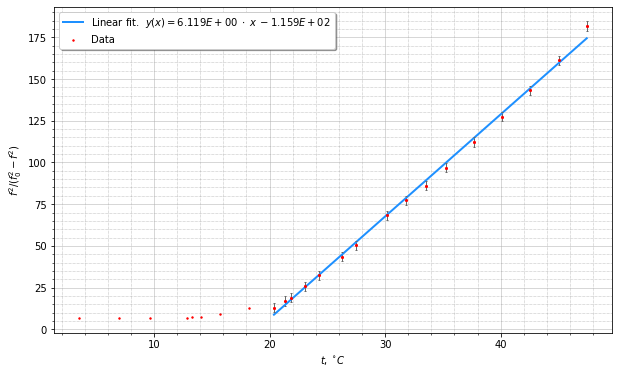

In [4]:
Y = np.array(data['f^2/(f0^2-f^2)'])
X = np.array(data['t'])

X_full = X
Y_full = Y

X = X[8:]
Y = Y[8:]

def approx(x, a, b):
    return a*x + b
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]

print('a = ', a)
print('b = ', b)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))

# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = X
ax.plot(dots, approx(dots, *beta_opt1), 'dodgerblue', lw = 2,  ls = '-')
ax.scatter(X_full, Y_full, s = 2, c = 'r')
lgnd = ax.legend([r'Linear fit.  $y(x) = {:.3E} \; \cdot \; x \; {:.3E}$'.format(a, b), 'Data'], loc='best', shadow=True)

# ax.set_title(r'')
ax.set_ylabel(r'$f^2/(f_0^2-f^2)$')
ax.set_xlabel(r'$t, \; ^{\circ}C$')


ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.errorbar(X, Y, fmt = 'ro', markersize = '2', yerr = S_e, capsize = 1, elinewidth = 1, capthick = 1, ecolor = 'dimgray')

plt.savefig('pictures/graph.png', dpi=400, quality=100)
plt.show()

In [5]:
t = abs(b/a)
t

18.945207077369073

In [6]:
t_error = np.sqrt((sigma_a/abs(a))**2 + (sigma_b/abs(b))**2)
t_error

0.028059163036620365

In [7]:
t_error_proc = t_error * 100
t_error_proc

2.8059163036620363

In [10]:
k_b = 8.617*10**(-5)
J = 3*k_b * (t+273)/(2 *12*7/2 * (7/2+1))
J

0.00019965808328457853

In [11]:
J * t_error_proc/100

5.602238710461115e-06

In [13]:
2.32/2 * 10000 * J

2.316033766101111

In [14]:
2.32/2 * 10000 * J * t_error_proc/100

0.06498596904134894

In [15]:
t + 273

291.94520707736905